<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da13_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movielens 데이터 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비

In [3]:
# 데이터 파일들의 경로
movies_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/movies.dat'
rating_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/ratings.dat'
users_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/users.dat'

In [4]:
# 데이터프레임 컬럼 이름
movies_col = ['movie_id', 'title', 'genres']
rating_col = ['user_id', 'movie_id', 'rating', 'timestamp']
users_col = ['user_id', 'gender', 'age', 'occupation', 'zip_code']

## movies 데이터프레임

In [5]:
movies = pd.read_csv(movies_path, sep='::', engine='python', names=movies_col)

In [7]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


## ratings 데이터프레임

In [9]:
ratings = pd.read_csv(rating_path, sep='::', engine='python', names=rating_col)

In [11]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
ratings.tail()

,user_id,movie_id,rating,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


## users 데이터프레임

In [14]:
users = pd.read_csv(users_path, sep='::', engine='python', names=users_col)

In [15]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


# 데이터프레임 합치기(merge/join)

## ratings와 movies를 merge

In [24]:
df = pd.merge(ratings, movies, left_on='movie_id', right_on='movie_id')

In [25]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1000209 non-null  int64 
 1   movie_id   1000209 non-null  int64 
 2   rating     1000209 non-null  int64 
 3   timestamp  1000209 non-null  int64 
 4   title      1000209 non-null  object
 5   genres     1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 45.8+ MB


# df와 users를 merge

In [27]:
# user_id 컬럼을 사용한 inner join
df = pd.merge(df, users)

In [28]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   gender      1000209 non-null  object
 7   age         1000209 non-null  int64 
 8   occupation  1000209 non-null  int64 
 9   zip_code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


# 데이터 탐색

* 성별 빈도수 데이터 탐색
* 연령대 빈도수
* 직업군 빈도수
* 별점의 빈도수

## 성별 분석

In [40]:
df.gender.value_counts()

,count
gender,
M,753769
F,246440


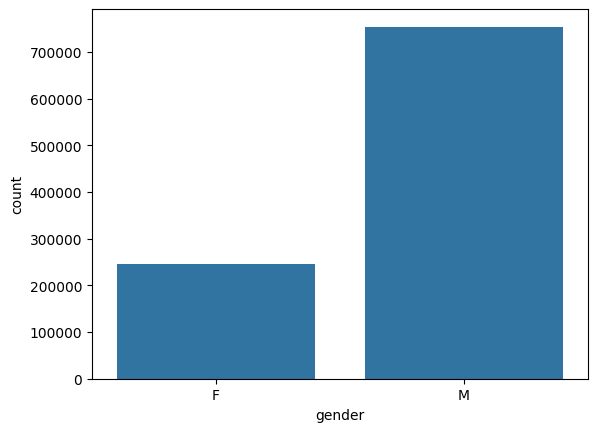

In [41]:
sns.countplot(data=df, x='gender')
plt.show()

## 연령대 분석

In [42]:
df.age.value_counts()

,count
age,
25,395556
35,199003
18,183536
45,83633
50,72490
56,38780
1,27211


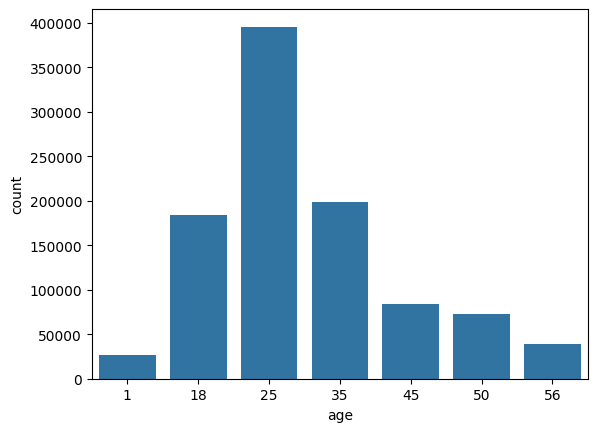

In [45]:
sns.countplot(data=df, x='age')
plt.show()

## 직업군 분석

In [46]:
df.occupation.value_counts()

,count
occupation,
4,131032
0,130499
7,105425
1,85351
17,72816
20,60397
12,57214
2,50068
14,49109


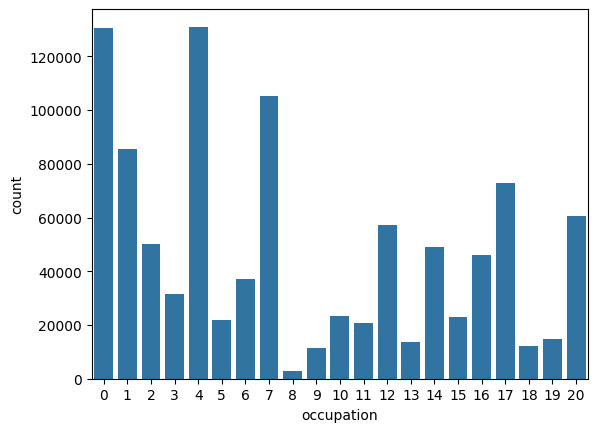

In [48]:
sns.countplot(data=df, x='occupation')
plt.show()

## 별점 분석

In [49]:
df.rating.value_counts()

,count
rating,
4,348971
3,261197
5,226310
2,107557
1,56174


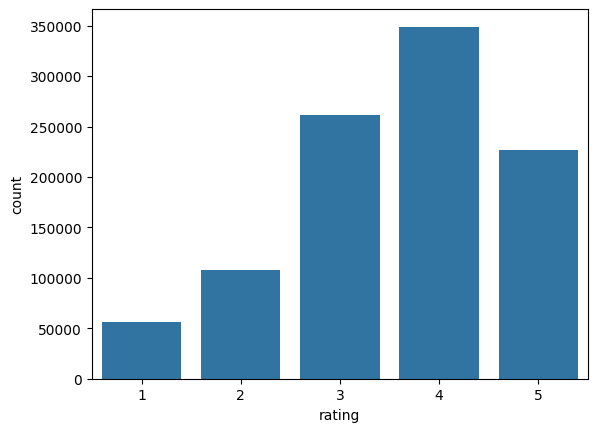

In [50]:
sns.countplot(data=df, x='rating')
plt.show()

In [51]:
df.rating.describe()

,rating
count,1.000209e+06
mean,3.581564e+00
std,1.117102e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


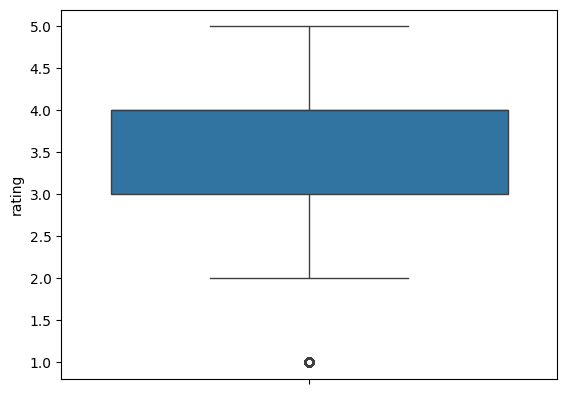

In [52]:
sns.boxplot(data=df, y='rating')
plt.show()

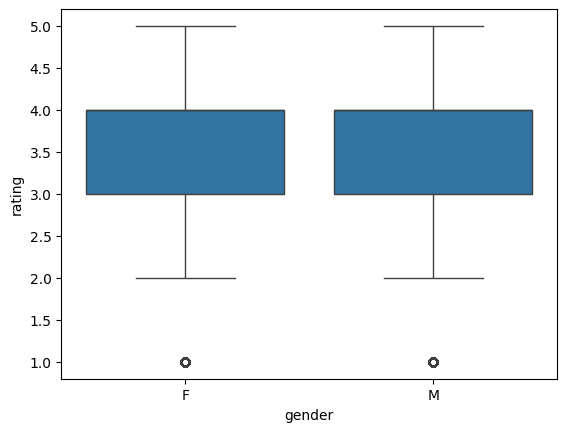

In [54]:
sns.boxplot(data=df, x='gender', y='rating')
plt.show()

# 데이터 분석

## 별점 평균 상위 10개, 하위 10개 영화 제목

In [56]:
by_title = df.groupby(by=['title']).rating.mean()

In [65]:
by_title.head(n=10)

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
1-900 (1994),2.500000
10 Things I Hate About You (1999),3.422857
101 Dalmatians (1961),3.596460
101 Dalmatians (1996),3.046703


In [71]:
by_title_sorted = by_title.sort_values(ascending=False)

In [72]:
by_title_sorted.head(n=10)

,rating
title,
Lured (1947),5.0
Ulysses (Ulisse) (1954),5.0
"Baby, The (1973)",5.0
Follow the Bitch (1998),5.0
Schlafes Bruder (Brother of Sleep) (1995),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0
"Gate of Heavenly Peace, The (1995)",5.0
One Little Indian (1973),5.0


In [73]:
by_title_sorted.tail(n=10)

,rating
title,
Sleepover (1995),1.0
"Loves of Carmen, The (1948)",1.0
Santa with Muscles (1996),1.0
"McCullochs, The (1975)",1.0
"Silence of the Palace, The (Saimt el Qusur) (1994)",1.0
Terror in a Texas Town (1958),1.0
White Boys (1999),1.0
Mutters Courage (1995),1.0
Shadows (Cienie) (1988),1.0


In [80]:
df[df.title == 'Silence of the Palace, The (Saimt el Qusur) (1994)']

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
883620,5334,127,1,960795494,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama,F,56,13,46140


별점 리뷰 건수가 1~2번 밖에 없는 영화들의 별점 평균은 큰 의미가 없어 보임.
일정 개수 이상의 별점 리뷰가 있는 영화들을 선택해서 별점 평균을 분석하는 것이 의미가 있을 것 같음.

In [81]:
title_count = df.title.value_counts()
title_count

,count
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
...,...
Aiqing wansui (1994),1
Broken Vessels (1998),1
White Boys (1999),1


In [83]:
title_count.describe()

,count
count,3706.000000
mean,269.889099
std,384.047838
min,1.000000
25%,33.000000
50%,123.500000
75%,350.000000
max,3428.000000


## 별점 리뷰 횟수가 120회 이상인 영화들만 선택

In [86]:
# 120번 이상 별점 리뷰를 받은 영화 제목들
indexer = title_count[title_count >= 120].index
indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Harriet the Spy (1996)', 'Dudley Do-Right (1999)',
       'Paris, Texas (1984)', 'Extreme Measures (1996)',
       'My Fellow Americans (1996)', 'Blue Hawaii (1961)', 'Backbeat (1993)',
       'Kazaam (1996)', 'Communion (1989)', 'Bed of Roses (1996)'],
      dtype='object', name='title', length=1879)

In [90]:
# 별점 리뷰 횟수가 120번 이상인 영화들의 별점 평균
by_title.loc[indexer]

,rating
title,
American Beauty (1999),4.317386
Star Wars: Episode IV - A New Hope (1977),4.453694
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977
Star Wars: Episode VI - Return of the Jedi (1983),4.022893
Jurassic Park (1993),3.763847
...,...
Blue Hawaii (1961),2.826446
Backbeat (1993),3.525000
Kazaam (1996),1.466667


In [93]:
# 별점 리뷰 횟수가 120번 이상인 영화들의 별점 평균 내림차순 정렬.
by_title_sorted = by_title.loc[indexer].sort_values(ascending=False)

In [95]:
# 별점 평균 상위 10개 영화
by_title_sorted.head(n=10)

,rating
title,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510
"Shawshank Redemption, The (1994)",4.554558
"Godfather, The (1972)",4.524966
"Close Shave, A (1995)",4.520548
"Usual Suspects, The (1995)",4.517106
Schindler's List (1993),4.510417
"Wrong Trousers, The (1993)",4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489
Raiders of the Lost Ark (1981),4.477725


In [97]:
# 별점 평균 하위 10개 영화
by_title_sorted.tail(n=10)

,rating
title,
Iron Eagle II (1988),1.864865
Jaws 3-D (1983),1.852381
"Flintstones in Viva Rock Vegas, The (2000)",1.804688
Stop! Or My Mom Will Shoot (1992),1.782123
Police Academy 5: Assignment: Miami Beach (1988),1.766667
Baby Geniuses (1999),1.701220
Police Academy 6: City Under Siege (1989),1.657718
Aces: Iron Eagle III (1992),1.640000
Battlefield Earth (2000),1.611111
